### Load libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Load data:

In [2]:
df = pd.read_csv("Ch10Ex11.csv", header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [3]:
print(df.shape)

(1000, 40)


### Reshape dataframe:

In [4]:
df = df.T
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


### Conduct hierarchical clustering:

In [5]:
Z = linkage(df, method='ward', metric='euclidean')
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2',
                             'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) 
                           for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z.head())
display(df_Z.tail())

,label1,label2,distance,#members
merged40,27,31,42.096535,2
merged41,10,14,42.531823,2
merged42,20,34,42.631657,2
merged43,23,29,42.775864,2
merged44,9,17,42.925283,2


,label1,label2,distance,#members
merged74,50,70,47.608066,9
merged75,67,69,47.796108,11
merged76,71,73,48.492297,20
merged77,74,75,48.835562,20
merged78,76,77,105.175382,40


#### Draw denogram:

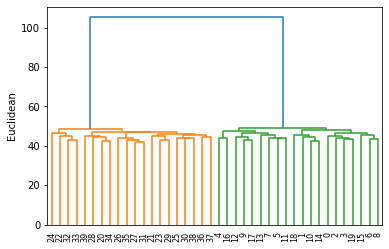

In [6]:
dendr = dendrogram(Z, labels=df.index)
plt.xticks(rotation=90)
plt.ylabel('Euclidean')
plt.show()

#### Display results of clustering:

In [7]:
dist = df_Z['distance']
n_clusters = 2
print('=== n_clusters:', n_clusters, '===')
cls = pd.Series(fcluster(Z, n_clusters, criterion='maxclust'), index=df.index)
print('dist:', dist[n_data-n_clusters])
print(list(cls))

=== n_clusters: 2 ===
dist: 48.83556244931771
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Trying out all methods:

In [8]:
n_clusters = 2
df_all = df.copy()
df_all['label'] = 'Healthy'
df_all.loc[20:, 'label'] = 'Diseased'

for lin in ['single', 'complete', 'centroid', 'average', 'ward']:
    Z = linkage(df, method=lin, metric='euclidean')
    cls = fcluster(Z, n_clusters, criterion='maxclust')
    print('Method:', lin)
    display(pd.crosstab(df_all['label'], cls))

Method: single


col_0,1,2
label,,
Diseased,0,20
Healthy,20,0


Method: complete


col_0,1,2
label,,
Diseased,0,20
Healthy,20,0


Method: centroid


col_0,1
label,
Diseased,20
Healthy,20


Method: average


col_0,1,2
label,,
Diseased,0,20
Healthy,20,0


Method: ward


col_0,1,2
label,,
Diseased,20,0
Healthy,0,20


### Comparing with k-means:

In [9]:
n_cls = 2
km = KMeans(n_clusters=n_cls, random_state=29)
cls = km.fit_predict(df)

In [10]:
print(cls)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


### Compare with Naive Bayes Classifier:

#### Obtain X, y and generate train and test sets:

In [11]:
X = df.copy()
y = np.array([0]*20+[1]*20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

#### Gaussian Naive Bayes Classfier:

In [12]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

#### Check accuracy of test set:

In [13]:
y_pred = model.predict(X_test)
print(model.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [14]:
print(accuracy_score(y_pred, y_test))

1.0


**Conclusion:** <br>
_ Using k-means or hierarchical clustering both correctly classify the dataset into 2 groups: healthy and diseased <br>
_ Naive Bayes Classifier also seems to classify this dataset well.

### Finding out the genes differs the most between 2 groups:

#### Conduct PCA:

In [15]:
sc = StandardScaler()
df_std = sc.fit_transform(df)

In [16]:
n_pca = 40
pca = PCA(n_components=n_pca)
df_pca = pca.fit_transform(df_std)

In [17]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[8.10827317e-02 3.44924126e-02 3.29874146e-02 3.15626215e-02
 3.08406794e-02 3.02618019e-02 2.91674728e-02 2.90062842e-02
 2.89034620e-02 2.85311510e-02 2.82894439e-02 2.75642246e-02
 2.69087959e-02 2.66950900e-02 2.60491442e-02 2.54689187e-02
 2.53298812e-02 2.48927358e-02 2.42689264e-02 2.41076980e-02
 2.38928249e-02 2.35379184e-02 2.30374845e-02 2.28677490e-02
 2.21060767e-02 2.17253607e-02 2.15848888e-02 2.10858986e-02
 2.05431537e-02 2.00149684e-02 1.97037824e-02 1.95072748e-02
 1.93075929e-02 1.90020137e-02 1.79355324e-02 1.77952780e-02
 1.70516264e-02 1.65957346e-02 1.62939509e-02 1.58280348e-32]
[0.08108273 0.11557514 0.14856256 0.18012518 0.21096586 0.24122766
 0.27039513 0.29940142 0.32830488 0.35683603 0.38512548 0.4126897
 0.4395985  0.46629359 0.49234273 0.51781165 0.54314153 0.56803427
 0.59230319 0.61641089 0.64030372 0.66384163 0.68687912 0.70974687
 0.73185294 0.7535783  0.77516319 0.79624909 0.81679225 0.83680721
 0.856511   0.87601827 0.89532586 0.91432788 0.93226341

In [18]:
for i in range(40):
    if np.cumsum(pca.explained_variance_ratio_)[i]>0.9:
        print(i)
        break

33


Since we want to attain 90% of total variance, let's make use of the first 33 PCAs.

#### Graph of contribution:

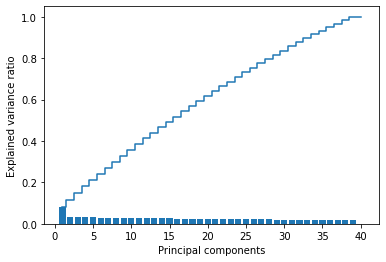

In [19]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [20]:
n_pca = 33
pca = PCA(n_components=n_pca)
df_pca = pca.fit_transform(df_std)

In [21]:
pca.components_.shape

(33, 1000)

#### Get absolute values of the total loadings:

In [22]:
loadings = pd.Series(np.sum(pca.components_, 0))
print(loadings.shape)

(1000,)


In [23]:
loadings = np.abs(loadings)

#### Genes differs the most between 2 groups:

In [24]:
print(loadings.nlargest(n=5, keep='first'))

249    0.667855
973    0.599611
871    0.567435
845    0.491063
781    0.490861
dtype: float64
